# ECG (Electrocardiogram)
-----
`NAME: V NAGASAI, ROLL: CS20B1016`

-----

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generating heart wave in python
-----

We know that 
$$Y = A\sin{(\omega t)}$$ 
Where,
- Y: Displacement
- A: Amplitude
- $\omega$: Angular frequency
- t: time

By converting angular frequency to frequency,
$$Y = A\sin{(2\pi ft)}$$
Where,
- f: frequency

Now by all these knowledge, lets generate different sin waves and then combine them to get a heart wave of PQRST complex.

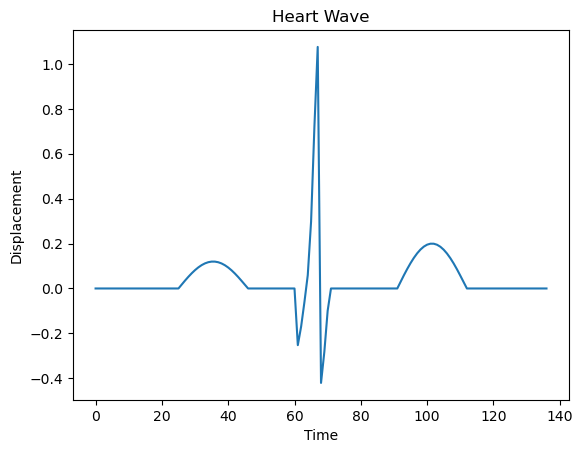

In [79]:
base_line = np.array([0]*25)
p_wave = 0.12*np.sin(np.arange(0, 3.15, 0.15))
pr_segment = np.array([0]*15)
q_wave = 0.3*np.sin(np.arange(-1, 0.2001, 0.4))
r_wave = 1.5*np.sin(np.arange(0.20001, 1, 0.3))
s_wave = 0.5*np.sin(np.arange(-1, 0.2, 0.4))
st_segment = np.array([0]*20)
t_wave = 0.2*np.sin(np.arange(0, 3.15, 0.15))
waves = [base_line, p_wave, pr_segment, q_wave, r_wave, s_wave,st_segment, t_wave, base_line]
heart_wave = np.array([])
for wave in waves:
	heart_wave = np.append(heart_wave, wave)

plt.plot(heart_wave)
plt.title("Heart Wave")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

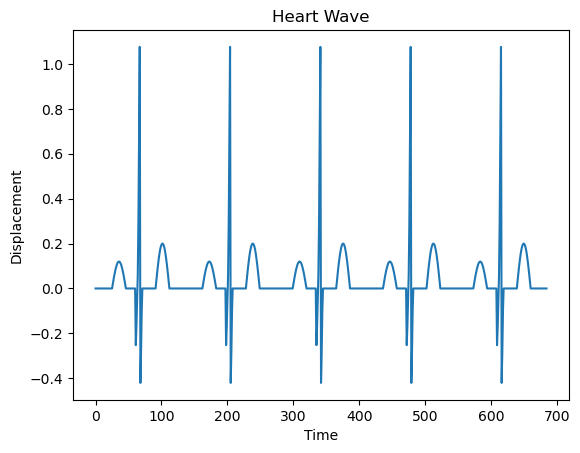

In [80]:
wave = np.array([])
for i in range(5):
	wave = np.append(wave, heart_wave)
plt.plot(wave)
plt.title("Heart Wave")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

# Filtering `R` wave from PQRST wave complex
------

There are many methods and algorithms to filter out `R` wave from PQRST wave complex, we can use some two basic algorithms to produce the result.
1. Filtering R wave by exponentiation (Here 5 is used)
2. By some threshold through experimentation (Here 0.1995 is threshold for displacement which was found through some experimentation)

Now lets use these two methods to filter out `R` wave.

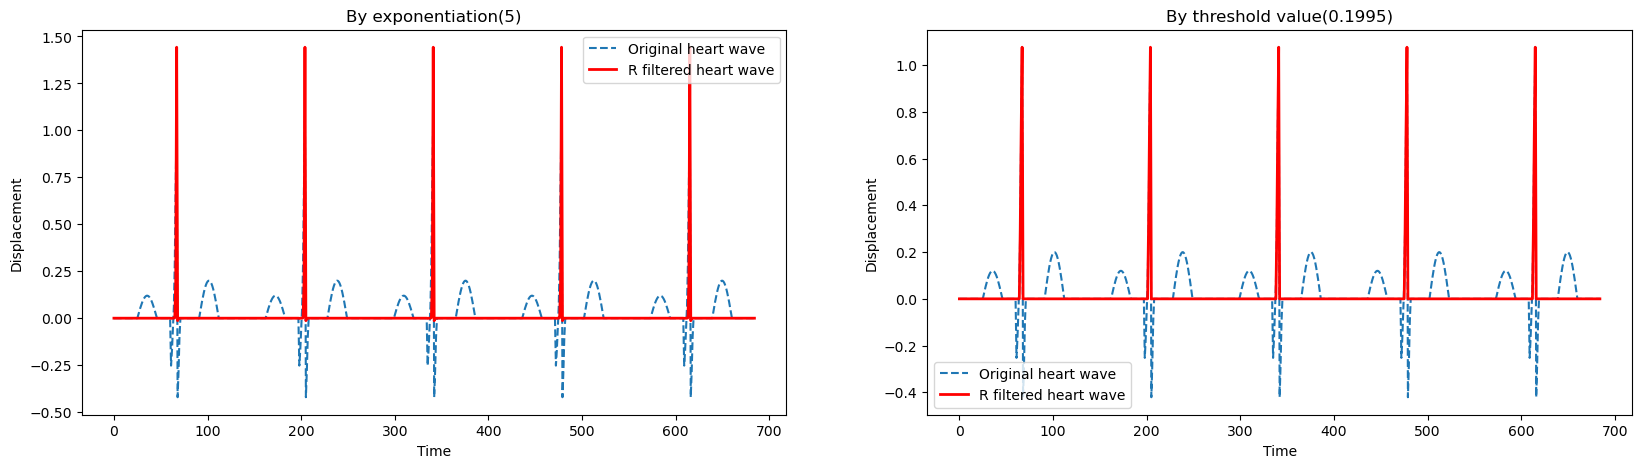

In [86]:
methods = ["By exponentiation(5)", "By threshold value(0.1995)"]

#Method 1: By exponentiation
r_filtered_wave = [[], []]
for val in wave:
	r_filtered_wave[0].append(val**5)

#Method 2: By threshold value through experimentation
for val in wave:
	if val > 0.1995:
		r_filtered_wave[1].append(val)
	else:
		r_filtered_wave[1].append(0)

plt.figure(figsize=(20, 5))
for i, method in enumerate(methods):
	plt.subplot(1, 2, i+1)
	plt.plot(wave,label='Original heart wave',linestyle='dashed', )
	plt.plot(r_filtered_wave[i],'r', label='R filtered heart wave',linewidth=2)
	plt.xlabel("Time")
	plt.ylabel("Displacement")
	plt.title(method)
	plt.legend()


# Finding heart rate through filter `R` wave
-----

Since one R wave indicate one beat, we need to count number of R peaks in the filter out r wave and then find the heart rate i.e., number of beats per minute.

In [82]:
r_peak_count = 0
flag = False

#By threshold value
for y in r_filtered_wave[1]:
	if y > 0.1995 and flag == False:
		flag = True
		r_peak_count += 1
	elif y < 0.1995:
		flag = False

time_taken = len(r_filtered_wave[1])/100 #Since we taken nearly 0.001 as each slot in x axis (measurement of x axis)
beats = (time_taken/r_peak_count)*60 #since it gives for each second we want beats per minute
print(f"Number of beats per minute: {round(beats)}")

Number of beats per minute: 82
